1. Загрузить встроенный в библиотеку sklearn датасет “Ирисы”. Несколькими способами, в том числе графическим, убедиться в отсутствии пропущенных значений.


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


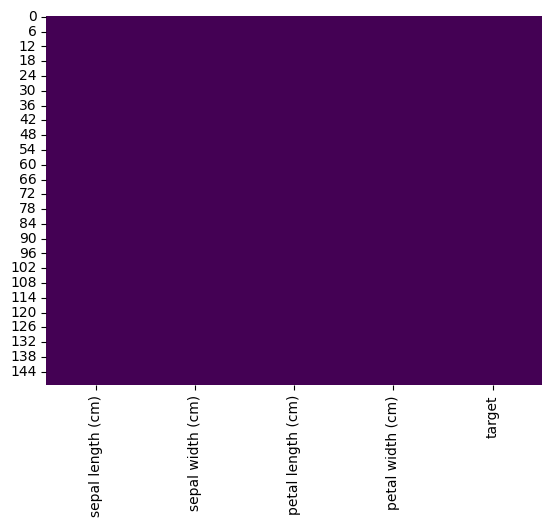

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Загрузка датасета
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

#Проверка пустых значений
print(iris_df.isna().sum())
print(iris_df.info())

#Графически показываем
sns.heatmap(iris_df.isna())
plt.show()

2. Загрузить встроенный в библиотеку sklearn датасет “Диабет”. Визуализировать распределение четырех любых признаков, входящих в датасет. Сделать содержательные выводы по полученным данным.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


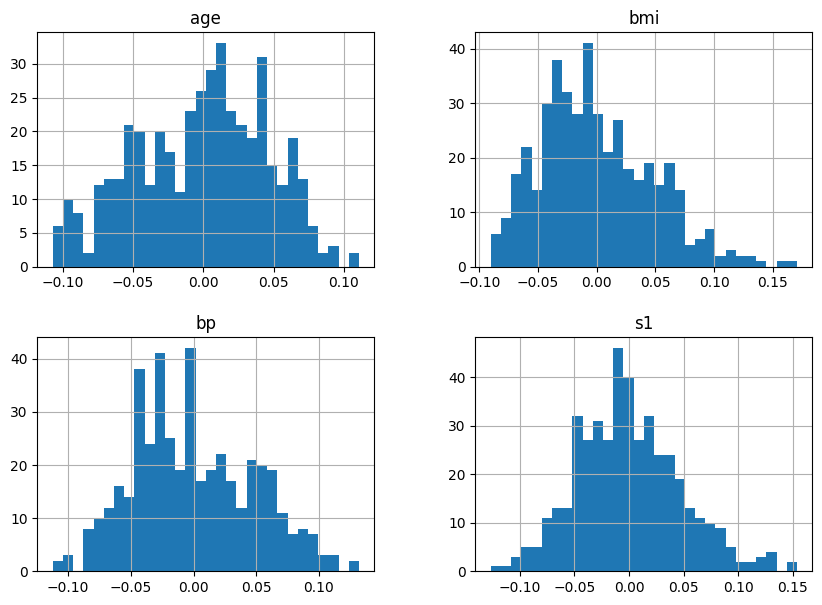

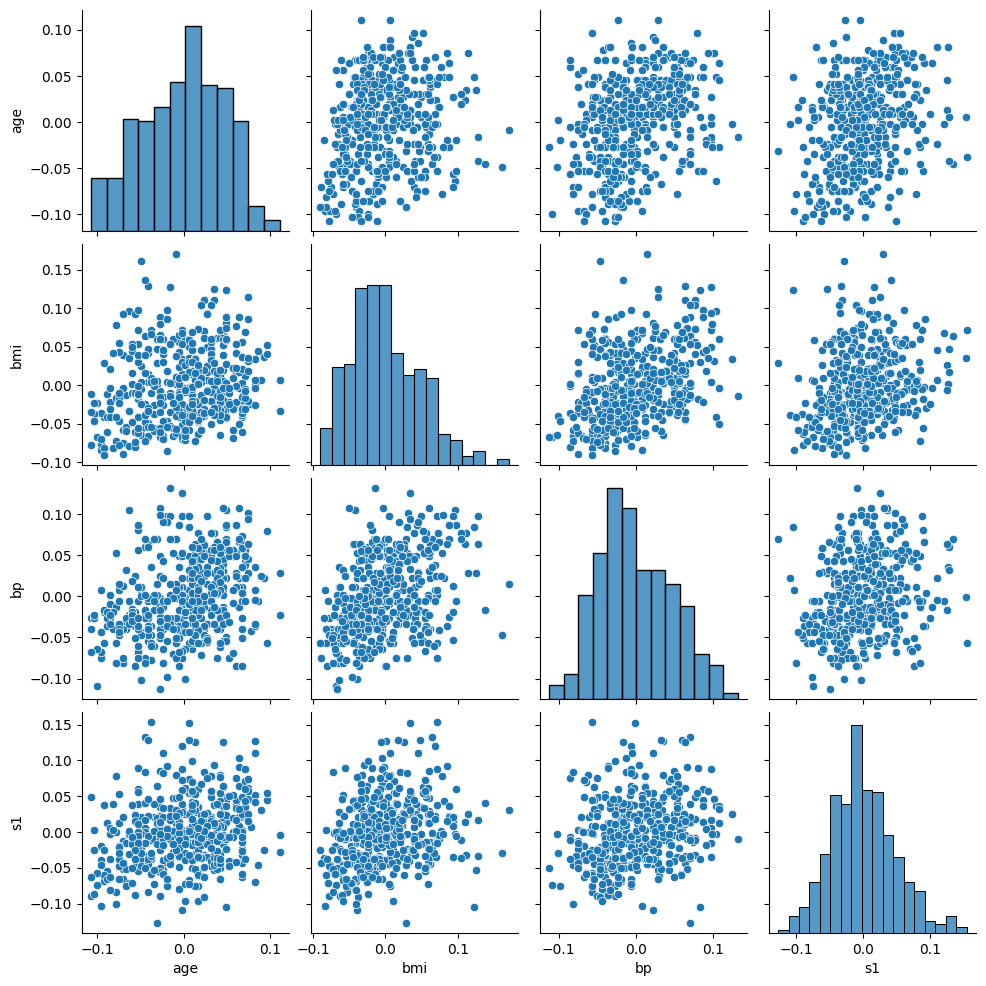

In [6]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета "Диабет"
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(diabetes_df.info())

# Выбор четырех признаков для визуализации
features = ['age', 'bmi', 'bp', 's1']


diabetes_df[features].hist(bins=30, figsize=(10,7))
plt.show()
# Визуализация распределения
sns.pairplot(diabetes_df[features])
plt.show()

# Содержательные выводы:
# - Распределение признаков можно использовать для выявления корреляций между признаками.
# - Некоторые признаки могут иметь нормальное распределение, другие - более смещенное.


3. Загрузить встроенный в библиотеку sklearn датасет “Рак груди”. Построить модель бинарной классификации любым методом. Вывести несколько первых теоретических и эмпирических значений целевой переменной. Сделать выводы по полученным результатам.

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Загрузка датасета
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели бинарной классификации
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Вывод первых теоретических и предсказанных значений
y_pred = model.predict(X_test)
print("Теоретические значения", y_test[:5])
print("Предсказанные", y_pred[:5])

# Оценка модели
print(classification_report(y_test, y_pred))

# Выводы
print("Модель показывает высокую точность в классификации, однако необходимо дополнительно проверить метрики на других данных для оценки надежности.")

Теоретические значения [1 0 0 1 1]
Предсказанные [1 0 0 1 1]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Модель показывает высокую точность в классификации, однако необходимо дополнительно проверить метрики на других данных для оценки надежности.


4. Загрузить встроенный в библиотеку sklearn датасет “Вина”. Построить линейную модель обучения с учителем, вывести и проинтерпретировать коэффициенты линейной модели. Коэффициенты должны выводиться вместе с названием соответствующего признака.

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression

# Загрузка данных
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Построение линейной модели
model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов
coefficients = pd.DataFrame(model.coef_, index=feature_names, columns=['Coefficient'])
print(coefficients)


                              Coefficient
alcohol                         -0.117004
malic_acid                       0.030171
ash                             -0.148552
alcalinity_of_ash                0.039854
magnesium                       -0.000490
total_phenols                    0.144320
flavanoids                      -0.372391
nonflavanoid_phenols            -0.303474
proanthocyanins                  0.039357
color_intensity                  0.075624
hue                             -0.149245
od280/od315_of_diluted_wines    -0.270054
proline                         -0.000701


5. Загрузить встроенный в библиотеку sklearn датасет “Калифорния”. Построить модель регрессии любым методом. Оптимизировать гиперпараметры модели при помощи поиска по сетке. Сделать выводы.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

california = fetch_california_housing()
X = california.data
y = california.target
print(california.DESCR)

model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grids = {'n_estimators':[5,10,50,100],
              'max_depth': [5,10,20,30],
              'min_samples_split': [1,2,5,10]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grids, cv=3)
res = grid_search.fit(X_train, y_train)
res.best_estimator_

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomForestRegressor(max_depth=20)

6. Загрузить встроенный в библиотеку sklearn датасет “Ирисы”. Построить модель множественной классификации любым методом. Оценить ее эффективность при помощи кросс-валидации. Сделать выводы.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Модель классификации
model = RandomForestClassifier()

# Кросс-валидация
scores = cross_val_score(model, X, y, cv=5)

print("Средняя точность:", np.mean(scores))
print("Отклонение:", np.std(scores))


Средняя точность: 0.9666666666666668
Отклонение: 0.02108185106778919


7. Загрузить встроенный в библиотеку sklearn датасет “Диабет”. Построить модель регрессии по методу опорных векторов с линейным ядром. Оценить ее эффективность по метрикам  r2, mae, rmse, mape. Сделать выводы о применимости модели.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Загрузка данных
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель регрессии
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R^2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


R^2: 0.020339939398460127
MAE: 61.90453309883161
RMSE: 72.0443451148522
MAPE: 0.5609460400282318


8. Загрузить встроенный в библиотеку sklearn датасет “Рак груди”. Построить модель бинарной линейной классификации. Задать значения аргументов конструктора объекта модели, отличающиеся от значений по умолчанию. Пояснить смысл каждого аргумента.

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Загрузка датасета
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Построение модели логистической регрессии с заданными параметрами
model = LogisticRegression(C=0.5, solver='liblinear', max_iter=100)

# Обучение модели
model.fit(X_train, y_train)

# Оценка качества модели
accuracy = model.score(X_test, y_test)

# Вывод результатов
print("Accuracy:", accuracy)

#  Параметр C=0.5, который представляет собой обратную силу регуляризации.
#  Параметр solver='liblinear' определяет алгоритм для оптимизации функции потерь.
#  Параметр max_iter=100 задает максимальное количество итераций для оптимизации.

Accuracy: 0.956140350877193


9. Загрузить встроенный в библиотеку sklearn датасет “Вина”. Построить модель множественной классификации по методу опорных векторов с полиномиальным ядром. Оценить ее эффективность по метрикам accuracy, precision, recall, f1. Сделать выводы о применимости модели.


In [9]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Загрузка датасета
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели SVM с полиномиальным ядром
model = SVC(kernel='poly', degree=3)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание меток классов
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Вывод результатов
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8333333333333334
Precision: 0.8717348927875244
Recall: 0.8333333333333334
F1 Score: 0.794334146058284


10. Загрузить встроенный в библиотеку sklearn датасет “Калифорния”. Построить модель регрессии с регуляризацией. Задать значения аргументов конструктора объекта модели, отличающиеся от значений по умолчанию. Пояснить смысл каждого аргумента.


In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Загрузка датасета
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Построение модели регрессии с регуляризацией
model = Ridge(alpha=0.1)

# Обучение модели
model.fit(X_train, y_train)

# Оценка качества модели
score = model.score(X_test, y_test)

# Вывод результатов
print("R^2 Score:", score)


R^2 Score: 0.5757944553633947
